In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import timedelta
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# DATASET BITCOIN

In [2]:
# Read data from the CSV file
data = pd.read_csv('Bitcoin Historical Data.csv')
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)
data = data.sort_index(ascending=False)
data = data.reset_index(drop=True)

data

,Date,Price,Open,High,Low,Vol.,Change %
0,2013-03-01,34.5,33.4,34.9,32.9,39.79K,3.36%
1,2013-03-02,34.3,34.5,34.8,33.2,36.66K,-0.72%
2,2013-03-03,34.5,34.3,34.5,33.8,12.53K,0.73%
3,2013-03-04,36.2,34.5,36.7,34.2,46.77K,4.78%
4,2013-03-05,40.3,36.2,40.7,36.2,85.43K,11.56%
...,...,...,...,...,...,...,...
4106,2024-05-28,68366.0,69428.3,69560.7,67299.9,71.39K,-1.53%
4107,2024-05-29,67635.8,68366.2,68897.6,67143.2,52.13K,-1.07%
4108,2024-05-30,68354.7,67631.3,69504.7,67138.4,66.84K,1.06%
4109,2024-05-31,67530.1,68352.3,69018.2,66676.8,61.51K,-1.21%


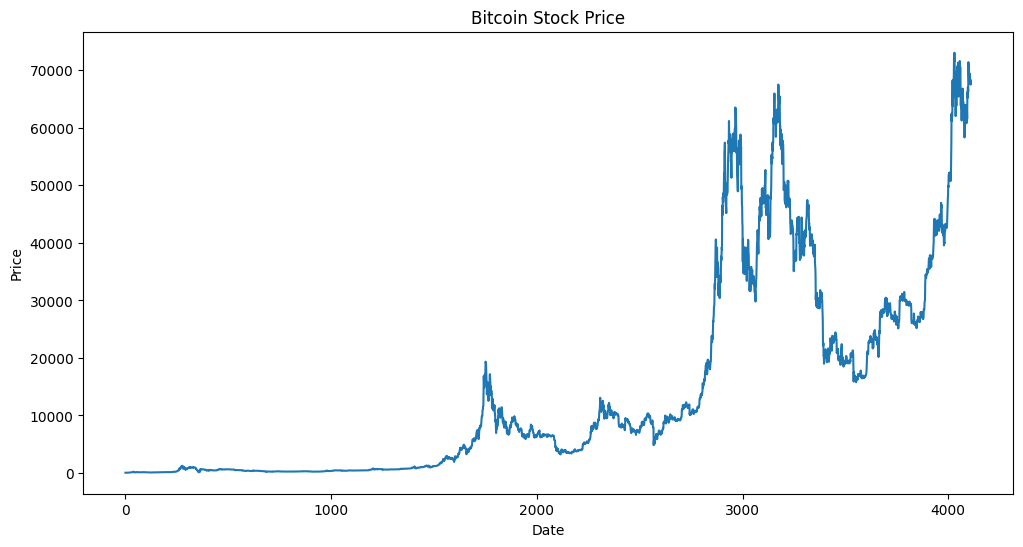

In [3]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data['Price'])
plt.title('Bitcoin Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [4]:
def convert_dates_to_timestamps(date_series):
    timestamps = date_series.apply(lambda x: x.timestamp())
    return timestamps.values.reshape(-1, 1)

date = convert_dates_to_timestamps(data['Date'])
date

array([[1.3620960e+09],
       [1.3621824e+09],
       [1.3622688e+09],
       ...,
       [1.7170272e+09],
       [1.7171136e+09],
       [1.7172000e+09]])

In [5]:
price = data['Price'].values.reshape(-1,1)
price

array([[3.45000e+01],
       [3.43000e+01],
       [3.45000e+01],
       ...,
       [6.83547e+04],
       [6.75301e+04],
       [6.77608e+04]])

### RETIO 6:4

In [6]:
# Split the data into training and testing sets 6:4
train_size = int(0.6 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]
x_train, x_test = date[:train_size], date[train_size:]
y_train, y_test = price[:train_size], price[train_size:]

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(x_test)
last_index = data['Date'].iloc[-1] 

# Generate the next 30, 60, 90 days
next_30_days = pd.date_range(start=last_index, periods=30, freq='D')
next_60_days = pd.date_range(start=last_index, periods=60, freq='D')
next_90_days = pd.date_range(start=last_index, periods=90, freq='D')

# Create an array of 30, 60, 90 consecutive integers starting from last_index
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
x_next_60_days = np.array([d.timestamp() for d in next_60_days]).reshape(-1, 1)
x_next_90_days = np.array([d.timestamp() for d in next_90_days]).reshape(-1, 1)

# Predict the closing prices for the next 30, 60, 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

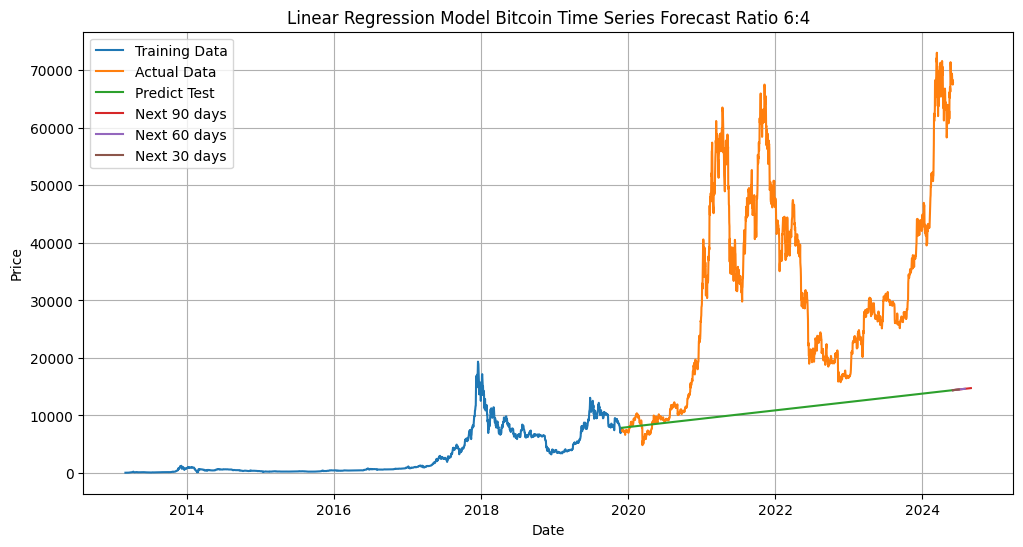

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Price'], label='Training Data')
plt.plot(test_data['Date'], test_data['Price'], label='Actual Data')
plt.plot(test_data['Date'], y_pred, label='Predict Test')
plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression Model Bitcoin Time Series Forecast Ratio 6:4')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 25973.607836358096
Testing MAE: 20231.913955722146
Testing MAPE: 52.63598140225607


### RETIO 7:3

In [10]:
# Split the data into training and testing sets 7:3
train_size = int(0.7 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]
x_train, x_test = date[:train_size], date[train_size:]
y_train, y_test = price[:train_size], price[train_size:]

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(x_test)
last_index = data['Date'].iloc[-1] 

# Generate the next 30, 60, 90 days
next_30_days = pd.date_range(start=last_index, periods=30, freq='D')
next_60_days = pd.date_range(start=last_index, periods=60, freq='D')
next_90_days = pd.date_range(start=last_index, periods=90, freq='D')

# Create an array of 30, 60, 90 consecutive integers starting from last_index
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
x_next_60_days = np.array([d.timestamp() for d in next_60_days]).reshape(-1, 1)
x_next_90_days = np.array([d.timestamp() for d in next_90_days]).reshape(-1, 1)

# Predict the closing prices for the next 30, 60, 90 days
y_next_30_days = model.predict(x_next_30_days + len(x_test))[-30:]
y_next_60_days = model.predict(x_next_60_days + len(x_test))[-60:]
y_next_90_days = model.predict(x_next_90_days + len(x_test))[-90:]

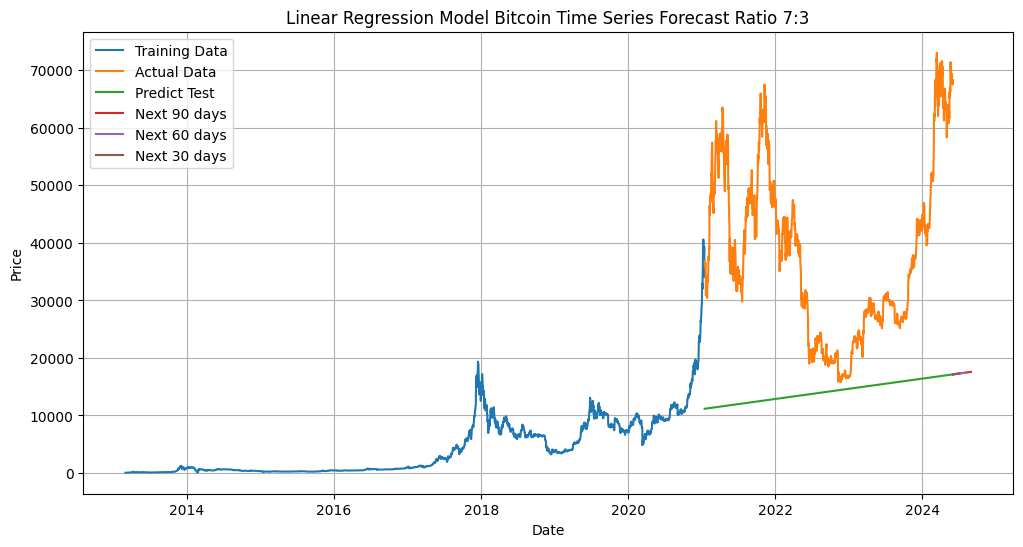

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Price'], label='Training Data')
plt.plot(test_data['Date'], test_data['Price'], label='Actual Data')
plt.plot(test_data['Date'], y_pred, label='Predict Test')
plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression Model Bitcoin Time Series Forecast Ratio 7:3')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("MAPE:", mape)

Testing RMSE: 27883.788070026025
Testing MAE: 23588.474543204728
MAPE: 55.901348242730165


### RETIO 8:2

In [14]:
# Split the data into training and testing sets 8:2
train_size = int(0.8 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]
x_train, x_test = date[:train_size], date[train_size:]
y_train, y_test = price[:train_size], price[train_size:]

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)
last_index = data['Date'].iloc[-1] 

# Generate the next 30, 60, 90 days
next_30_days = pd.date_range(start=last_index, periods=30, freq='D')
next_60_days = pd.date_range(start=last_index, periods=60, freq='D')
next_90_days = pd.date_range(start=last_index, periods=90, freq='D')

# Create an array of 30, 60, 90 consecutive integers starting from last_index
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
x_next_60_days = np.array([d.timestamp() for d in next_60_days]).reshape(-1, 1)
x_next_90_days = np.array([d.timestamp() for d in next_90_days]).reshape(-1, 1)

# Predict the closing prices for the next 30, 60, 90 days
y_next_30_days = model.predict(x_next_30_days + len(x_test))[-30:]
y_next_60_days = model.predict(x_next_60_days + len(x_test))[-60:]
y_next_90_days = model.predict(x_next_90_days + len(x_test))[-90:]

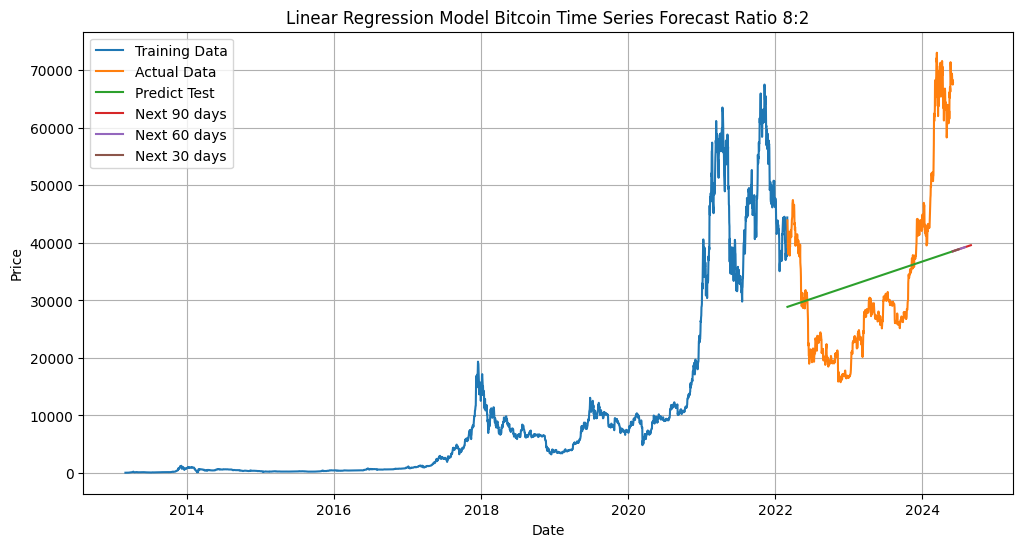

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Price'], label='Training Data')
plt.plot(test_data['Date'], test_data['Price'], label='Actual Data')
plt.plot(test_data['Date'], y_pred, label='Predict Test')
plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression Model Bitcoin Time Series Forecast Ratio 8:2')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("MAPE:", mape)

Testing RMSE: 13118.313572026793
Testing MAE: 10752.596332720033
MAPE: 35.37628355711821


# DATASET NASDAQ

In [18]:
# Read data from the CSV file
data = pd.read_csv('NASDAQ Composite Historical Data.csv')
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)
data = data.sort_index(ascending=False)
data = data.reset_index(drop=True)

data

,Date,Price,Open,High,Low,Vol.,Change %
0,2013-03-01,3169.74,3143.54,3171.50,3129.40,431.39M,0.30%
1,2013-03-04,3182.03,3159.46,3182.27,3154.79,397.77M,0.39%
2,2013-03-05,3224.13,3200.38,3227.31,3200.27,418.69M,1.32%
3,2013-03-06,3222.37,3233.31,3233.44,3217.67,377.54M,-0.05%
4,2013-03-07,3232.09,3224.50,3235.10,3221.47,365.78M,0.30%
...,...,...,...,...,...,...,...
2828,2024-05-24,16920.79,16786.79,16947.79,16771.58,953.61M,1.10%
2829,2024-05-28,17019.88,16988.31,17032.65,16917.51,1.10B,0.59%
2830,2024-05-29,16920.58,16879.35,16989.60,16873.97,1.15B,-0.58%
2831,2024-05-30,16737.08,16878.63,16900.46,16690.36,1.11B,-1.08%


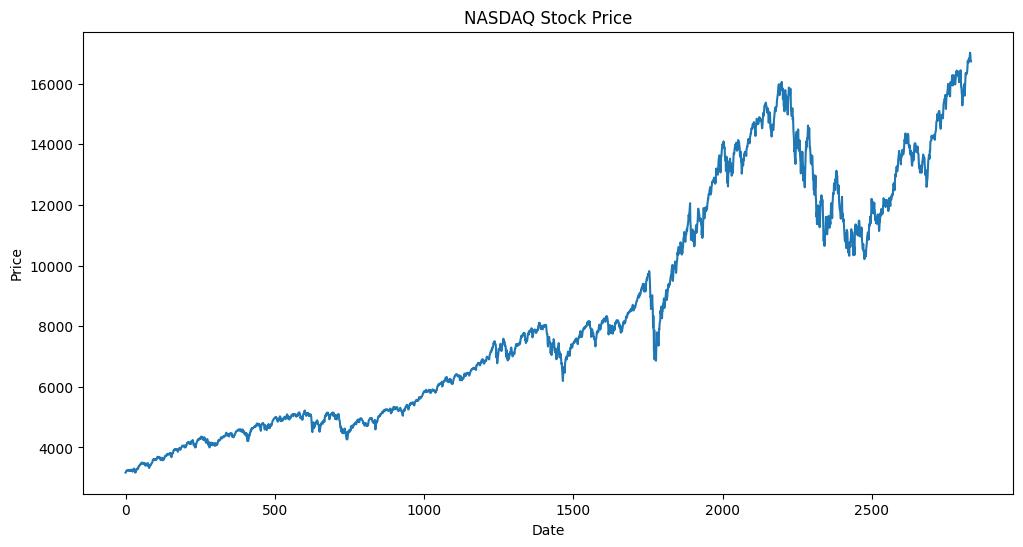

In [19]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data['Price'])
plt.title('NASDAQ Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [20]:
def convert_dates_to_timestamps(date_series):
    timestamps = date_series.apply(lambda x: x.timestamp())
    return timestamps.values.reshape(-1, 1)

date = convert_dates_to_timestamps(data['Date'])
date

array([[1.3620960e+09],
       [1.3623552e+09],
       [1.3624416e+09],
       ...,
       [1.7169408e+09],
       [1.7170272e+09],
       [1.7171136e+09]])

In [21]:
price = data['Price'].values.reshape(-1,1)
price

array([[ 3169.74],
       [ 3182.03],
       [ 3224.13],
       ...,
       [16920.58],
       [16737.08],
       [16735.02]])

### RETIO 6:4

In [22]:
# Split the data into training and testing sets 6:4
train_size = int(0.6 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]
x_train, x_test = date[:train_size], date[train_size:]
y_train, y_test = price[:train_size], price[train_size:]

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(x_test)
last_index = data['Date'].iloc[-1] 

# Generate the next 30, 60, 90 days
next_30_days = pd.date_range(start=last_index, periods=30, freq='D')
next_60_days = pd.date_range(start=last_index, periods=60, freq='D')
next_90_days = pd.date_range(start=last_index, periods=90, freq='D')

# Create an array of 30, 60, 90 consecutive integers starting from last_index
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
x_next_60_days = np.array([d.timestamp() for d in next_60_days]).reshape(-1, 1)
x_next_90_days = np.array([d.timestamp() for d in next_90_days]).reshape(-1, 1)

# Predict the closing prices for the next 30, 60, 90 days
y_next_30_days = model.predict(x_next_30_days + len(x_test))[-30:]
y_next_60_days = model.predict(x_next_60_days + len(x_test))[-60:]
y_next_90_days = model.predict(x_next_90_days + len(x_test))[-90:]

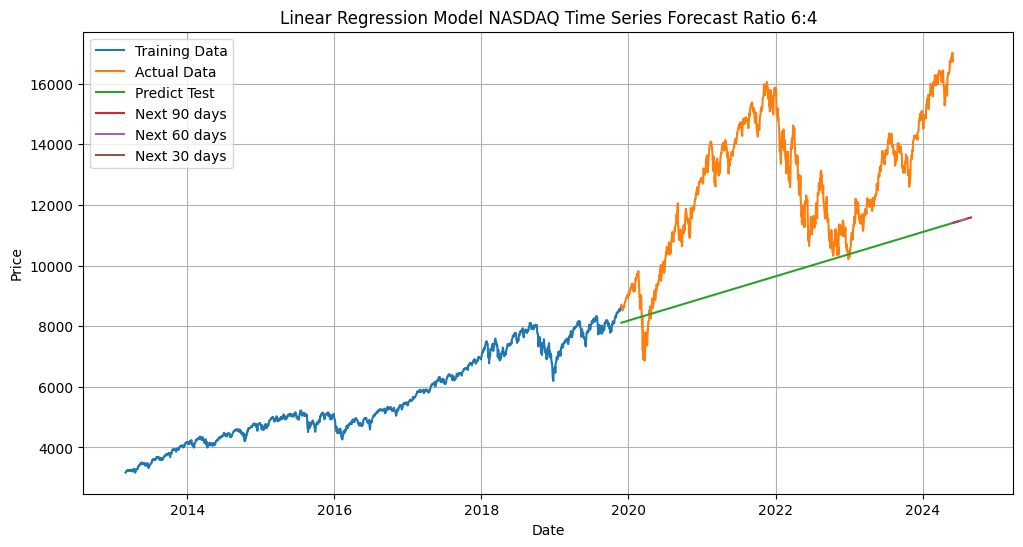

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Price'], label='Training Data')
plt.plot(test_data['Date'], test_data['Price'], label='Actual Data')
plt.plot(test_data['Date'], y_pred, label='Predict Test')
plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression Model NASDAQ Time Series Forecast Ratio 6:4')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("MAPE:", mape)

Testing RMSE: 3431.359154575183
Testing MAE: 2961.6474799581038
MAPE: 21.862912526434684


### RETIO 7:3

In [26]:
# Split the data into training and testing sets 7:3
train_size = int(0.7 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]
x_train, x_test = date[:train_size], date[train_size:]
y_train, y_test = price[:train_size], price[train_size:]

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(x_test)
last_index = data['Date'].iloc[-1] 

# Generate the next 30, 60, 90 days
next_30_days = pd.date_range(start=last_index, periods=30, freq='D')
next_60_days = pd.date_range(start=last_index, periods=60, freq='D')
next_90_days = pd.date_range(start=last_index, periods=90, freq='D')

# Create an array of 30, 60, 90 consecutive integers starting from last_index
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
x_next_60_days = np.array([d.timestamp() for d in next_60_days]).reshape(-1, 1)
x_next_90_days = np.array([d.timestamp() for d in next_90_days]).reshape(-1, 1)

# Predict the closing prices for the next 30, 60, 90 days
y_next_30_days = model.predict(x_next_30_days + len(x_test))[-30:]
y_next_60_days = model.predict(x_next_60_days + len(x_test))[-60:]
y_next_90_days = model.predict(x_next_90_days + len(x_test))[-90:]

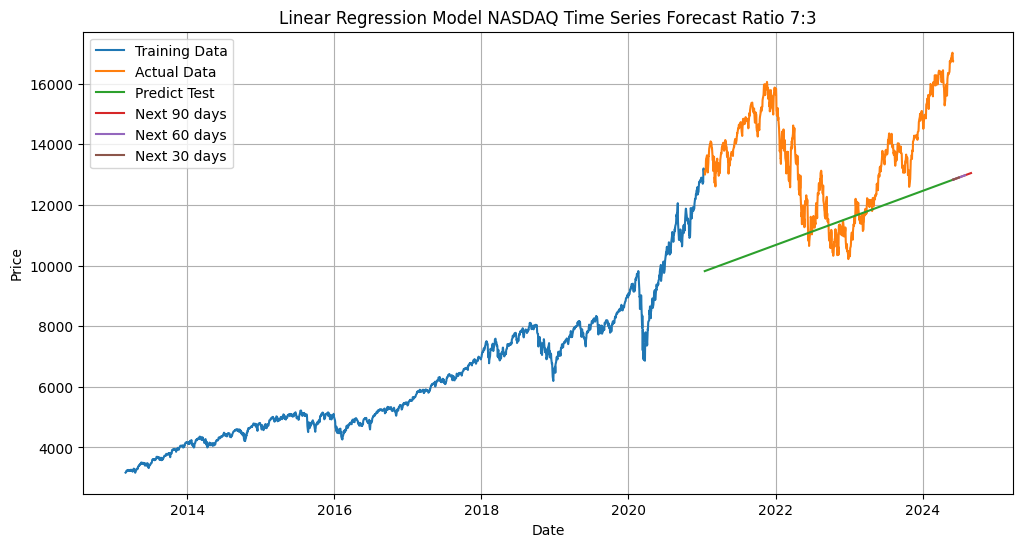

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Price'], label='Training Data')
plt.plot(test_data['Date'], test_data['Price'], label='Actual Data')
plt.plot(test_data['Date'], y_pred, label='Predict Test')
plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression Model NASDAQ Time Series Forecast Ratio 7:3')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("MAPE:", mape)

Testing RMSE: 2835.4880478916507
Testing MAE: 2346.4436067235224
MAPE: 16.375205981767653


### RETIO 8:2

In [30]:
# Split the data into training and testing sets 8:2
train_size = int(0.8 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]
x_train, x_test = date[:train_size], date[train_size:]
y_train, y_test = price[:train_size], price[train_size:]

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(x_test)
last_index = data['Date'].iloc[-1] 

# Generate the next 30, 60, 90 days
next_30_days = pd.date_range(start=last_index, periods=30, freq='D')
next_60_days = pd.date_range(start=last_index, periods=60, freq='D')
next_90_days = pd.date_range(start=last_index, periods=90, freq='D')

# Create an array of 30, 60, 90 consecutive integers starting from last_index
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
x_next_60_days = np.array([d.timestamp() for d in next_60_days]).reshape(-1, 1)
x_next_90_days = np.array([d.timestamp() for d in next_90_days]).reshape(-1, 1)

# Predict the closing prices for the next 30, 60, 90 days
y_next_30_days = model.predict(x_next_30_days + len(x_test))[-30:]
y_next_60_days = model.predict(x_next_60_days + len(x_test))[-60:]
y_next_90_days = model.predict(x_next_90_days + len(x_test))[-90:]

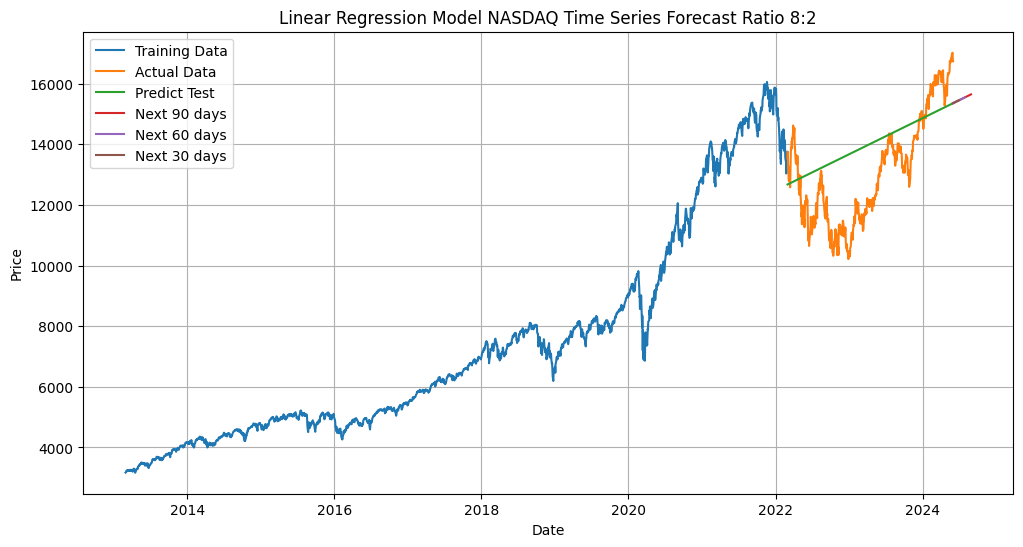

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Price'], label='Training Data')
plt.plot(test_data['Date'], test_data['Price'], label='Actual Data')
plt.plot(test_data['Date'], y_pred, label='Predict Test')
plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression Model NASDAQ Time Series Forecast Ratio 8:2')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("MAPE:", mape)

Testing RMSE: 1575.341960386097
Testing MAE: 1338.098936405015
MAPE: 11.029555608338262


# DATASET USD

In [34]:
# Read data from the CSV file
data = pd.read_csv('US Dollar Index Futures Historical Data.csv')
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.sort_index(ascending=False)
data = data.reset_index(drop=True)

data

,Date,Price,Open,High,Low,Vol.,Change %
0,2013-03-01,82.358,82.010,82.580,81.850,34.83K,0.43%
1,2013-03-04,82.255,82.355,82.530,82.230,19.76K,-0.13%
2,2013-03-05,82.147,82.210,82.300,81.955,25.02K,-0.13%
3,2013-03-06,82.507,82.020,82.640,81.975,26.04K,0.44%
4,2013-03-07,82.123,82.615,82.620,81.995,35.17K,-0.47%
...,...,...,...,...,...,...,...
2902,2024-05-27,104.638,104.645,104.670,104.485,3.09K,0.00%
2903,2024-05-28,104.539,104.490,104.560,104.260,11.02K,-0.09%
2904,2024-05-29,105.034,104.590,105.085,104.515,17.66K,0.47%
2905,2024-05-30,104.658,105.095,105.135,104.575,17.83K,-0.36%


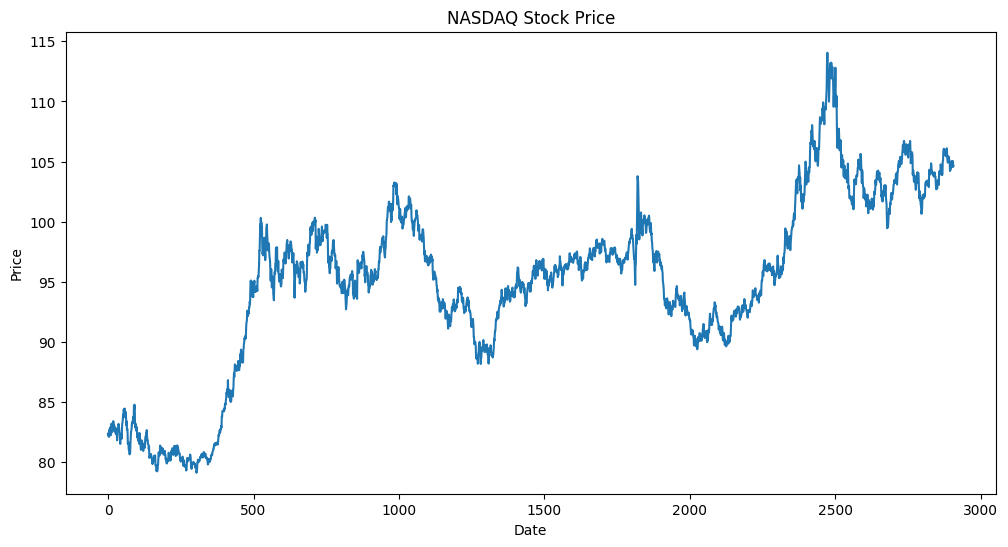

In [35]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data['Price'])
plt.title('NASDAQ Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [36]:
def convert_dates_to_timestamps(date_series):
    timestamps = date_series.apply(lambda x: x.timestamp())
    return timestamps.values.reshape(-1, 1)

date = convert_dates_to_timestamps(data['Date'])
date

array([[1.3620960e+09],
       [1.3623552e+09],
       [1.3624416e+09],
       ...,
       [1.7169408e+09],
       [1.7170272e+09],
       [1.7171136e+09]])

In [37]:
price = data['Price'].values.reshape(-1,1)
price

array([[ 82.358],
       [ 82.255],
       [ 82.147],
       ...,
       [105.034],
       [104.658],
       [104.627]])

### RETIO 6:4

In [38]:
# Split the data into training and testing sets 6:4
train_size = int(0.6 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]
x_train, x_test = date[:train_size], date[train_size:]
y_train, y_test = price[:train_size], price[train_size:]

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(x_test)
last_index = data['Date'].iloc[-1] 

# Generate the next 30, 60, 90 days
next_30_days = pd.date_range(start=last_index, periods=30, freq='D')
next_60_days = pd.date_range(start=last_index, periods=60, freq='D')
next_90_days = pd.date_range(start=last_index, periods=90, freq='D')

# Create an array of 30, 60, 90 consecutive integers starting from last_index
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
x_next_60_days = np.array([d.timestamp() for d in next_60_days]).reshape(-1, 1)
x_next_90_days = np.array([d.timestamp() for d in next_90_days]).reshape(-1, 1)

# Predict the closing prices for the next 30, 60, 90 days
y_next_30_days = model.predict(x_next_30_days + len(x_test))[-30:]
y_next_60_days = model.predict(x_next_60_days + len(x_test))[-60:]
y_next_90_days = model.predict(x_next_90_days + len(x_test))[-90:]

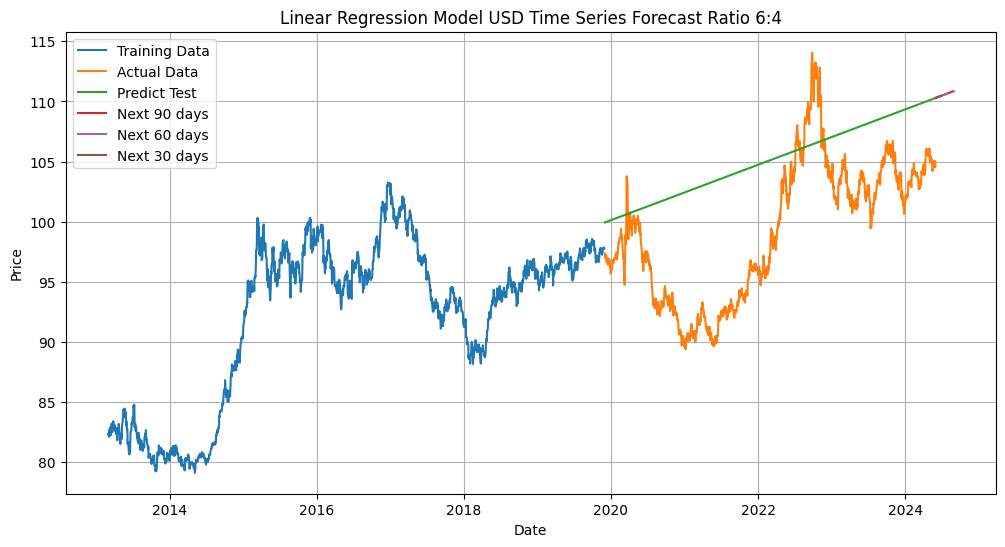

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Price'], label='Training Data')
plt.plot(test_data['Date'], test_data['Price'], label='Actual Data')
plt.plot(test_data['Date'], y_pred, label='Predict Test')
plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression Model USD Time Series Forecast Ratio 6:4')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("MAPE:", mape)

Testing RMSE: 7.2715767670720375
Testing MAE: 6.337208913383977
MAPE: 6.571750547239873


### RETIO 7:3

In [42]:
# Split the data into training and testing sets 7:3
train_size = int(0.7 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]
x_train, x_test = date[:train_size], date[train_size:]
y_train, y_test = price[:train_size], price[train_size:]

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(x_test)
last_index = data['Date'].iloc[-1] 

# Generate the next 30, 60, 90 days
next_30_days = pd.date_range(start=last_index, periods=30, freq='D')
next_60_days = pd.date_range(start=last_index, periods=60, freq='D')
next_90_days = pd.date_range(start=last_index, periods=90, freq='D')

# Create an array of 30, 60, 90 consecutive integers starting from last_index
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
x_next_60_days = np.array([d.timestamp() for d in next_60_days]).reshape(-1, 1)
x_next_90_days = np.array([d.timestamp() for d in next_90_days]).reshape(-1, 1)

# Predict the closing prices for the next 30, 60, 90 days
y_next_30_days = model.predict(x_next_30_days + len(x_test))[-30:]
y_next_60_days = model.predict(x_next_60_days + len(x_test))[-60:]
y_next_90_days = model.predict(x_next_90_days + len(x_test))[-90:]

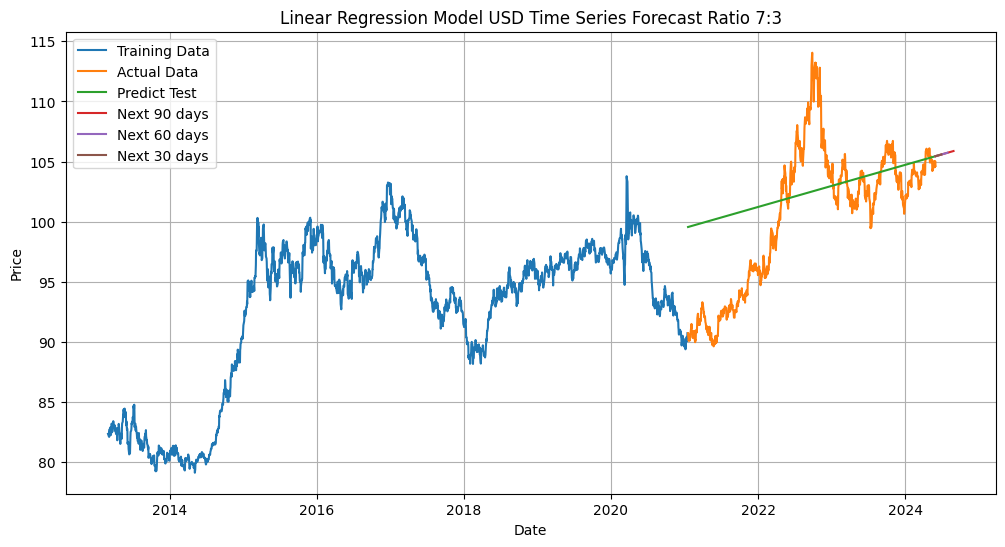

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Price'], label='Training Data')
plt.plot(test_data['Date'], test_data['Price'], label='Actual Data')
plt.plot(test_data['Date'], y_pred, label='Predict Test')
plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression Model USD Time Series Forecast Ratio 7:3')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("MAPE:", mape)

Testing RMSE: 5.164894060464381
Testing MAE: 4.044112804001302
MAPE: 4.157832801173607


### RETIO 8:2

In [46]:
# Split the data into training and testing sets 8:2
train_size = int(0.8 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]
x_train, x_test = date[:train_size], date[train_size:]
y_train, y_test = price[:train_size], price[train_size:]

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(x_test)
last_index = data['Date'].iloc[-1] 

# Generate the next 30, 60, 90 days
next_30_days = pd.date_range(start=last_index, periods=30, freq='D')
next_60_days = pd.date_range(start=last_index, periods=60, freq='D')
next_90_days = pd.date_range(start=last_index, periods=90, freq='D')

# Create an array of 30, 60, 90 consecutive integers starting from last_index
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
x_next_60_days = np.array([d.timestamp() for d in next_60_days]).reshape(-1, 1)
x_next_90_days = np.array([d.timestamp() for d in next_90_days]).reshape(-1, 1)

# Predict the closing prices for the next 30, 60, 90 days
y_next_30_days = model.predict(x_next_30_days + len(x_test))[-30:]
y_next_60_days = model.predict(x_next_60_days + len(x_test))[-60:]
y_next_90_days = model.predict(x_next_90_days + len(x_test))[-90:]

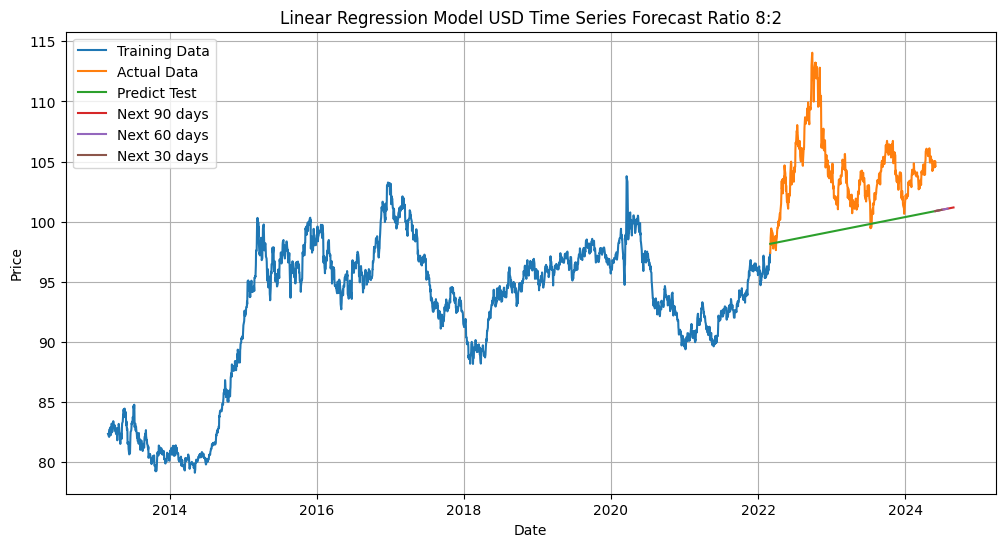

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Price'], label='Training Data')
plt.plot(test_data['Date'], test_data['Price'], label='Actual Data')
plt.plot(test_data['Date'], y_pred, label='Predict Test')
plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression Model USD Time Series Forecast Ratio 8:2')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("MAPE:", mape)

Testing RMSE: 5.585021011951124
Testing MAE: 4.665586695605353
MAPE: 4.40341418362856
